In [715]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [716]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from jcopml.plot import plot_correlation_matrix

import warnings
warnings.filterwarnings("ignore")

IMPORT DATASET

In [717]:
df = pd.read_csv(r'D:\Latihan Car Predict\car_price_prediction.csv')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [718]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [720]:
df.drop(['ID','Doors','Airbags','Cylinders','Engine volume'], axis = 1, inplace= True)

In [721]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005 km,Automatic,4x4,Left wheel,Silver
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000 km,Tiptronic,4x4,Left wheel,Black
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,200000 km,Variator,Front,Right-hand drive,Black
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966 km,Automatic,4x4,Left wheel,White
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901 km,Automatic,Front,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,300000 km,Manual,Rear,Left wheel,Silver
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,161600 km,Tiptronic,Front,Left wheel,Red
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,116365 km,Automatic,Front,Left wheel,Grey
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,51258 km,Automatic,Front,Left wheel,Black


In [722]:
df['Mileage'] = df['Mileage'].str.replace('km', '')

In [723]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Mileage', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

In [724]:
print(df["Manufacturer"].unique())

['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']


In [725]:
# df['Levy'].replace({'-':np.nan}, inplace=True)

In [726]:
df = df[df['Levy'] != '-']

In [727]:
df['Levy'] = df['Levy'].astype(float)

In [728]:
df['Mileage']=df['Mileage'].astype(int)

In [729]:
# median_levy = df['Levy'].median()

# df['Levy'] = df['Levy'].replace(0, median_levy)

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13418 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13418 non-null  int64  
 1   Levy              13418 non-null  float64
 2   Manufacturer      13418 non-null  object 
 3   Model             13418 non-null  object 
 4   Prod. year        13418 non-null  int64  
 5   Category          13418 non-null  object 
 6   Leather interior  13418 non-null  object 
 7   Fuel type         13418 non-null  object 
 8   Mileage           13418 non-null  int32  
 9   Gear box type     13418 non-null  object 
 10  Drive wheels      13418 non-null  object 
 11  Wheel             13418 non-null  object 
 12  Color             13418 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(9)
memory usage: 1.4+ MB


OUTLIER

In [731]:
display(df[df.Price == df.Price.max()])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color
8541,872946,2067.0,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,2531,Tiptronic,4x4,Left wheel,Black


In [732]:
display(df[df.Mileage == df.Mileage.max()])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color
19167,18817,1995.0,FORD,Transit,2003,Microbus,No,Diesel,2147483647,Manual,Front,Left wheel,White


In [733]:
def detect_outliers(df,features,thold):
    
    outlier_indices=[]
    for f in features:
        Q1=np.percentile(df[f],25)
        Q3=np.percentile(df[f],75)
        IQR = Q3-Q1
        outlier_step = IQR*thold
        outlier_col_idx = df[(df[f]< Q1-outlier_step) | (df[f]> Q3+outlier_step)].index
        outlier_indices.extend(outlier_col_idx)
        
    return outlier_indices

In [734]:
features = ['Price', 'Levy', 'Mileage']
outliers = detect_outliers(df,features, 1.5)
deleted_df = df.drop(df.loc[outliers].index,axis=0)

In [735]:
# df['Z-Scores of Mileage'] = (df['Mileage'] - df['Mileage'].mean()) / df['Mileage'].std()

# rows_above_2 = df[df['Z-Scores of Mileage'] > 2]

# df = df[df['Z-Scores of Mileage'] <= 2]
# df = df.drop('Z-Scores of Mileage', axis=1)

<AxesSubplot: >

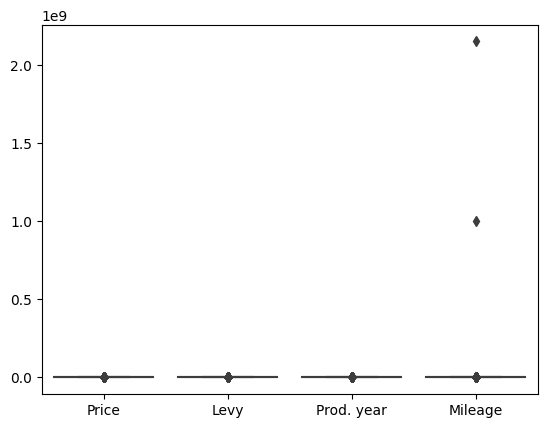

In [736]:
sns.boxplot(df)

EDA

In [737]:
fig = px.histogram(df, x='Manufacturer', labels = 'Manufacturer', title = 'Jumlah Model Mobil Yang Dihasilkan Tiap Pabrikan')
fig.show()

In [738]:
top10cars = df['Manufacturer'].value_counts().sort_values(ascending = False)[:10]

fig = px.bar(df, x = top10cars.index, y = top10cars.values, title = '10 Pabrikan Mobil Berdasarkan Jumlah Mobil Yang Beredar', color=top10cars.index)
fig.show()

In [739]:
top10price = df.groupby('Manufacturer')['Price'].sum()
sorteddf = top10price.sort_values(ascending = False)[:10]

fig = px.bar(df, x = sorteddf.index , y = sorteddf.values, title = '10 Besar Pabrikan Mobil Berdasarkan Jumlah Harga', color = sorteddf)
fig.show()

In [740]:
top10_expensive = (
    df.groupby('Manufacturer')
        .apply(lambda group: group[group['Price'] == group['Price'].max()])
        .reset_index(drop=True)[:10]
)

fig = px.bar(top10_expensive, x='Manufacturer', y='Price', color='Model', title='10 Model Mobil Paling Mahal per Pabrikan')
fig.show()

In [741]:
grouped_data = df.groupby(['Manufacturer', 'Fuel type'])['Price'].sum()
sorted_group = grouped_data.sort_values(ascending = False)[:10]

print(sorted_group)

Manufacturer   Fuel type
HYUNDAI        Diesel       45760553
               Petrol       25387708
TOYOTA         Petrol       17123246
               Hybrid       15163497
SSANGYONG      Diesel       11514380
LEXUS          Petrol       11482983
MERCEDES-BENZ  Petrol       10875033
HONDA          Petrol        8731524
CHEVROLET      Petrol        8290177
HYUNDAI        LPG           8175186
Name: Price, dtype: int64


In [742]:
grouped_data = df.groupby(['Manufacturer', 'Fuel type'])['Price'].sum()
sorted_group = grouped_data.sort_values(ascending = False)[:10]

plot_data = sorted_group.reset_index()

fig = px.bar(plot_data, x = 'Manufacturer', y = 'Price', title = '7 Pabrikan Mobil Dengan Jumlah Harga Tertinggi Berdasarkan Jenis Bensin', color = 'Fuel type')
fig.show()

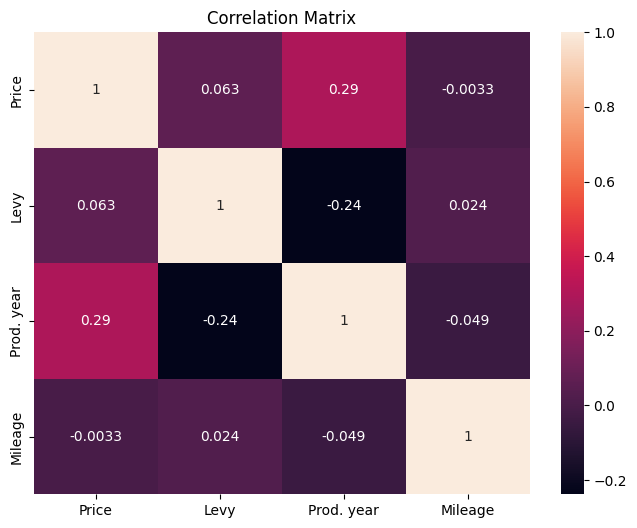

In [743]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cbar = True)
plt.title('Correlation Matrix')
plt.show()

In [744]:
df.dtypes

Price                 int64
Levy                float64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Mileage               int32
Gear box type        object
Drive wheels         object
Wheel                object
Color                object
dtype: object

In [745]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Mileage', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

In [746]:
df_new = pd.get_dummies(df, columns = ['Manufacturer', 'Model', 'Category',
       'Leather interior', 'Fuel type', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color'])

In [747]:
df_new.head()

,Price,Levy,Prod. year,Mileage,Manufacturer_ACURA,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399.0,2010,186005,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16621,1018.0,2011,192000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,862.0,2011,168966,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11726,446.0,2014,91901,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,39493,891.0,2016,160931,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [748]:
X = df_new.drop("Price", axis=1)
y = df_new["Price"]

In [749]:
X

,Levy,Prod. year,Mileage,Manufacturer_ACURA,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1399.0,2010,186005,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1018.0,2011,192000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,862.0,2011,168966,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,446.0,2014,91901,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,891.0,2016,160931,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1055.0,2013,107800,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19233,831.0,2011,161600,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,836.0,2010,116365,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19235,1288.0,2007,51258,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [750]:
y

0        13328
1        16621
3         3607
4        11726
5        39493
         ...  
19231     5802
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 13418, dtype: int64

In [751]:
 X = np.array(X)
 y = np.array(y)

In [752]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

XGBOOST

In [753]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.6851096187138779

DECISION TREE

In [754]:
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)
dec_model.score(X_test, y_test)

0.6685074075369511

RANDOM FOREST

In [755]:
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
random_model.score(X_test, y_test)

0.7626774320905696

LINEAR REGRESSION

In [756]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.4886765576793668